In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [6]:
from sklearn.datasets import fetch_california_housing

In [178]:
california = fetch_california_housing()

In [180]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [182]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [184]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [20]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [26]:
california.target_names

['MedHouseVal']

In [28]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Preparing the dataset

In [186]:
df = pd.DataFrame(california.data,columns=california.feature_names)

In [188]:
df['price'] = california.target

In [190]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [43]:
# descriptive statstical summary
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [45]:
# checking missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

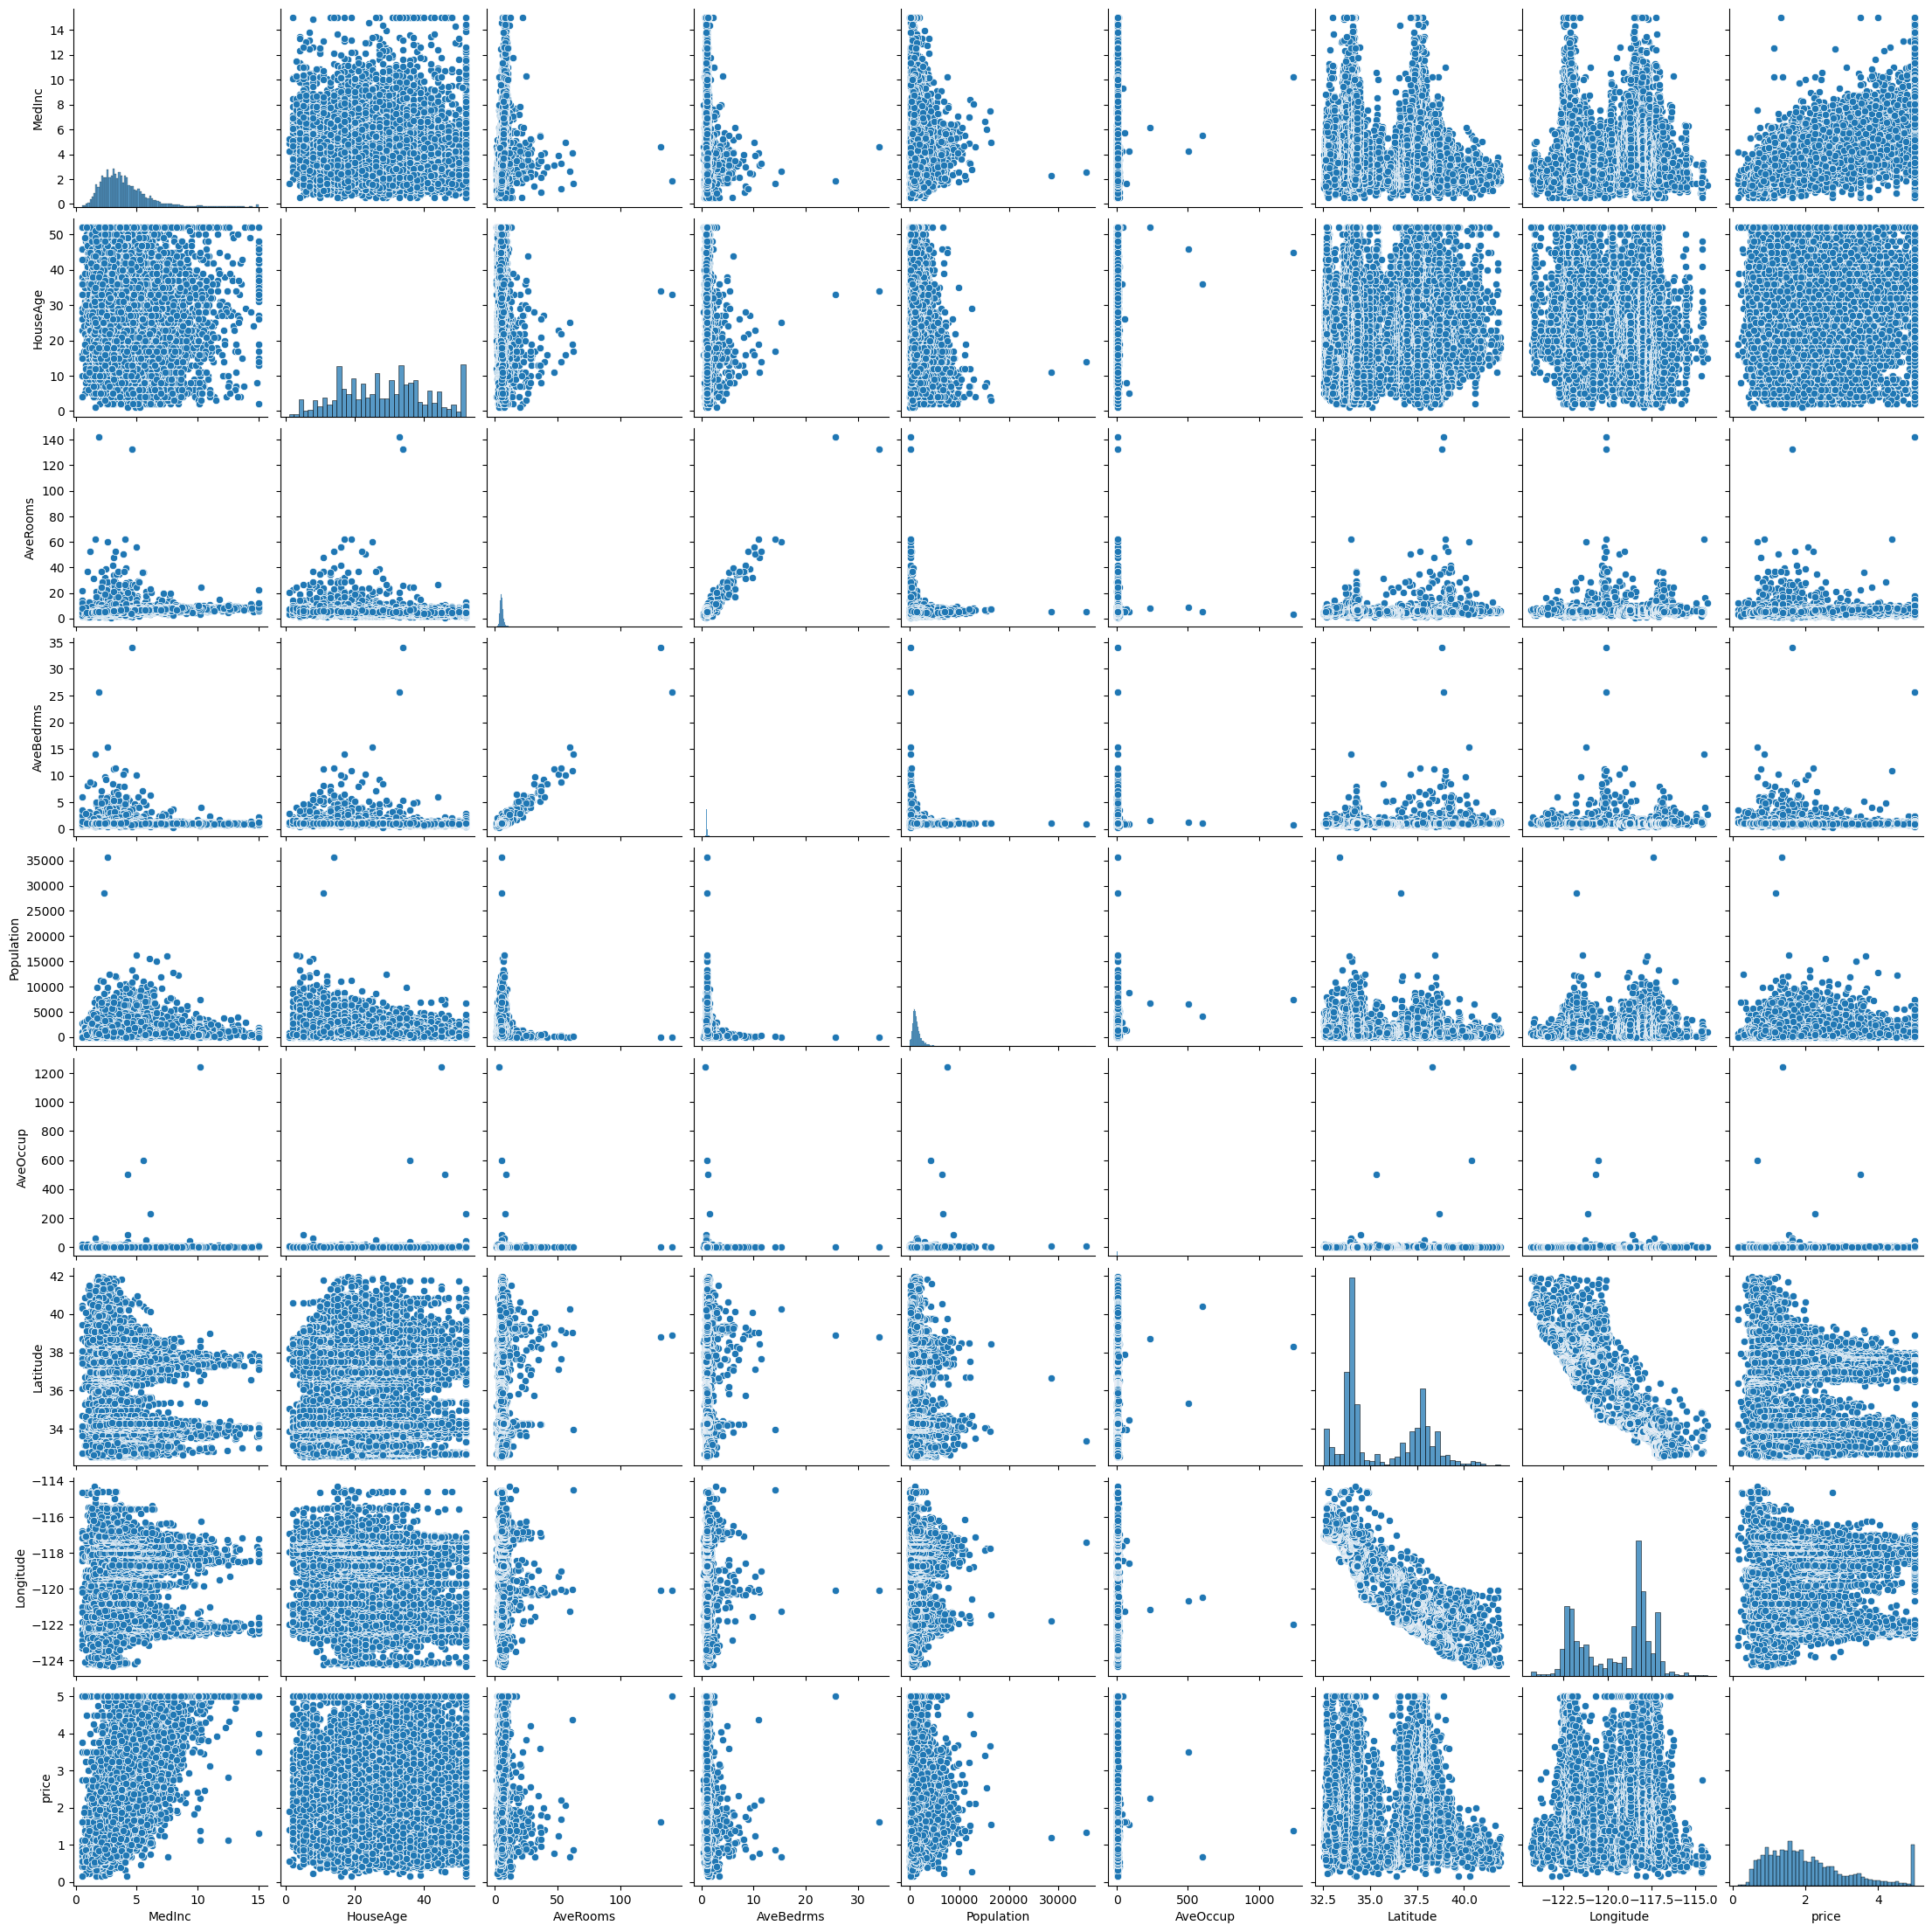

In [194]:
# Exploratory Data Analysis
import seaborn as sns
sns.pairplot(df)

In [49]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'House age')

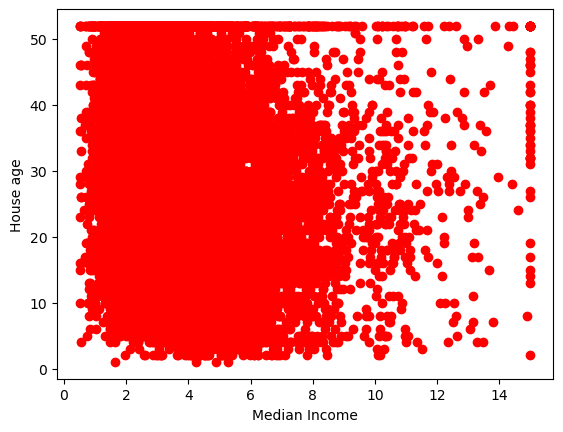

In [55]:
# visualization of data points
#plt.figure(figsize=(15,20))
plt.scatter(df['MedInc'],df['HouseAge'],color='r')
plt.xlabel('Median Income')
plt.ylabel('House age')

Text(0, 0.5, 'House age')

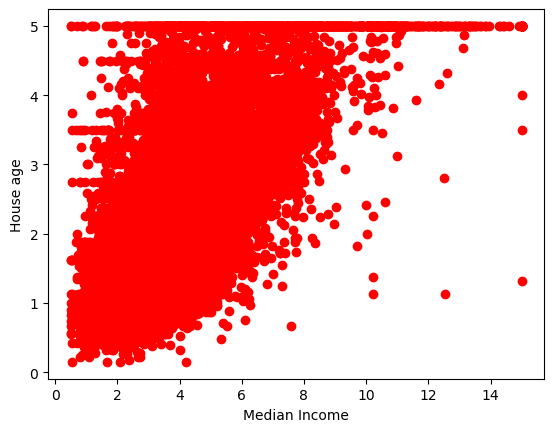

In [67]:
plt.scatter(df['MedInc'],df['price'],color='r')
plt.xlabel('Median Income')
plt.ylabel('House age')

In [69]:
correlation = df.corr()

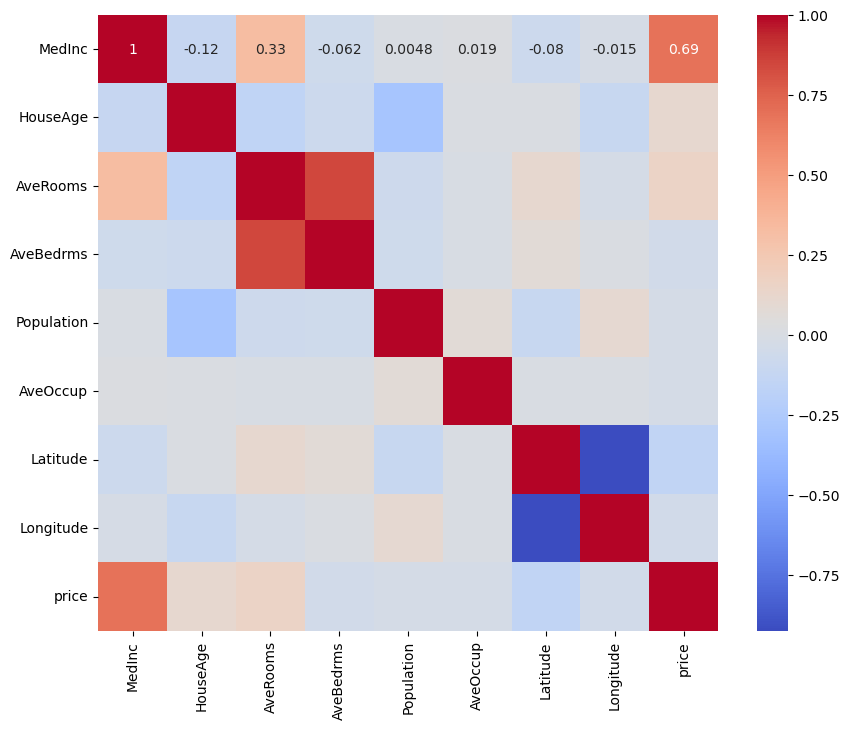

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

In [75]:
# dropping the unnecessary columns
df.drop(columns=['AveBedrms', 'Population'],axis=1,inplace=True)

In [77]:
df.head()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422


In [79]:
# Dependent and Independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [81]:
X.head()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25


In [83]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: price, dtype: float64

In [196]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

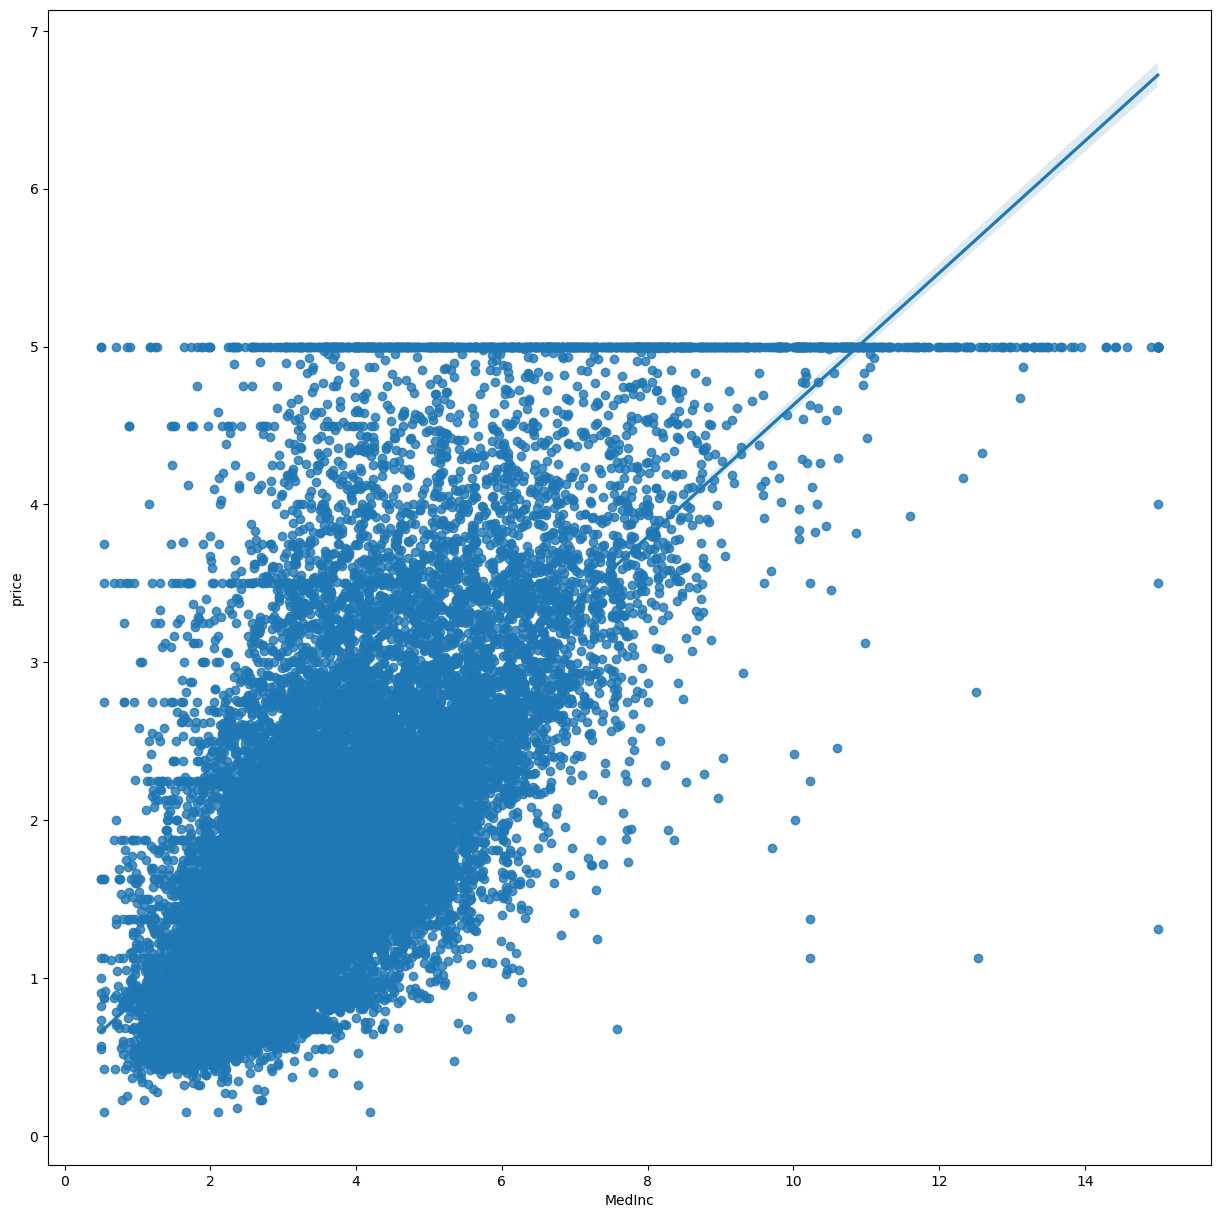

In [198]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.regplot(x=df['MedInc'],y=df['price'])
plt.show()

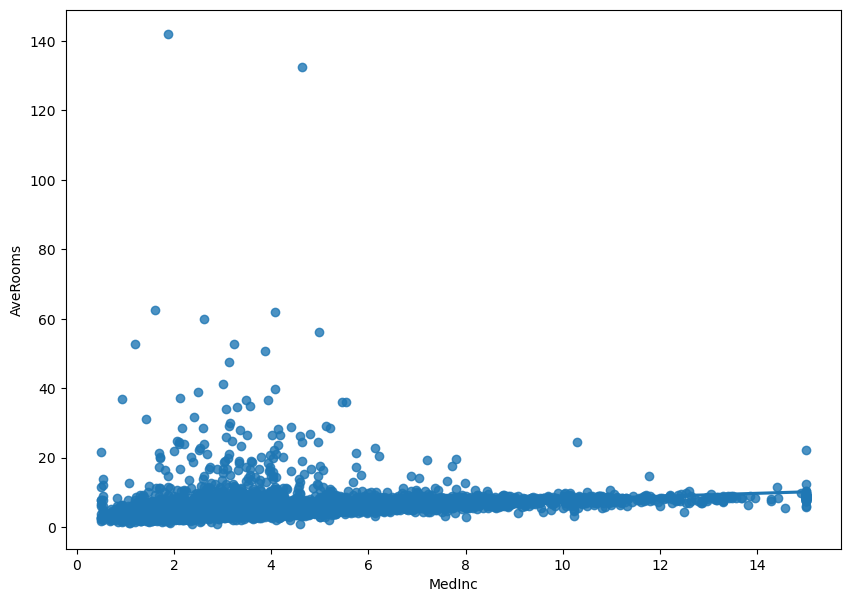

In [200]:
plt.figure(figsize=(10,7))
sns.regplot(x=df['MedInc'],y=df['AveRooms'])
plt.show()

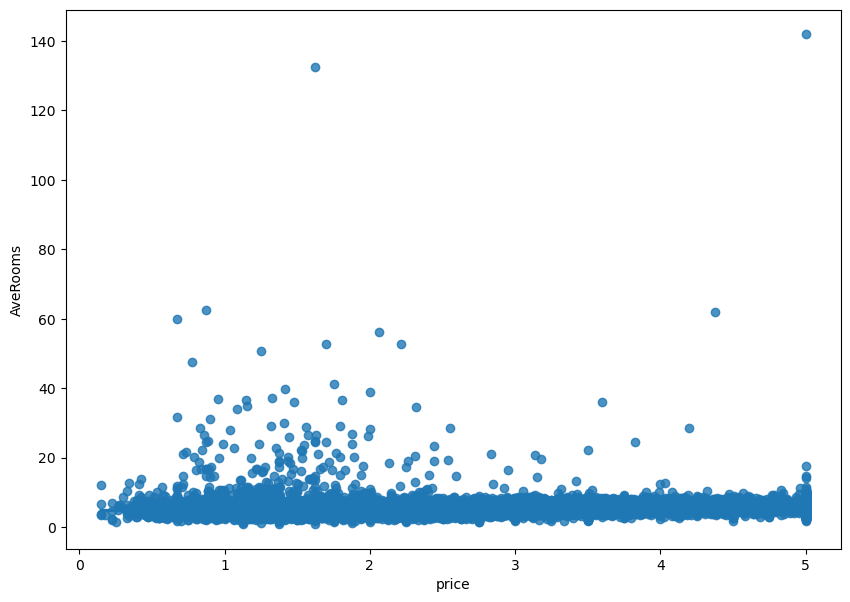

In [202]:
plt.figure(figsize=(10,7))
sns.regplot(x=df['price'],y=df['AveRooms'])
plt.show()

In [99]:
# standardization of the dataset
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [206]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646,  0.05137609, -1.3728112 ,
         1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, -0.11736222, -0.87669601,
         0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, -0.03227969, -0.46014647,
        -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918,  0.02030568, -0.75500738,
         0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517,  0.00707608,  0.90651045,
        -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, -0.08535429,  0.99543676,
        -1.41489815]])

In [210]:
X_test

array([[-1.15508475, -0.28632369, -0.52068576,  0.06740798,  0.1951    ,
         0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, -0.03602975, -0.23549054,
         0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, -0.14998876,  1.00947776,
        -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, -0.02646898,  0.78014149,
        -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, -0.04390537,  0.52740357,
        -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 ,  0.05466644, -0.66608108,
         0.60445493]])

## Model Training

In [120]:
from sklearn.linear_model import LinearRegression

In [212]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [214]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [216]:
validation_score

array([-0.53803925, -0.52774037, -0.54762771])

In [218]:
np.mean(validation_score)

-0.5378024400963959

In [257]:
# printing the coefficients and the intercepts
print(regression.coef_)
print(regression.intercept_)

[ 0.70836644  0.12449981  0.04593673 -0.03774583 -0.97736795 -0.93107854]
2.0719469373788777


In [222]:
# prediction with the test data
y_pred = regression.predict(X_test)
y_pred

array([0.73524823, 1.7508374 , 2.47163861, ..., 4.44492683, 1.30323326,
       1.89332387])

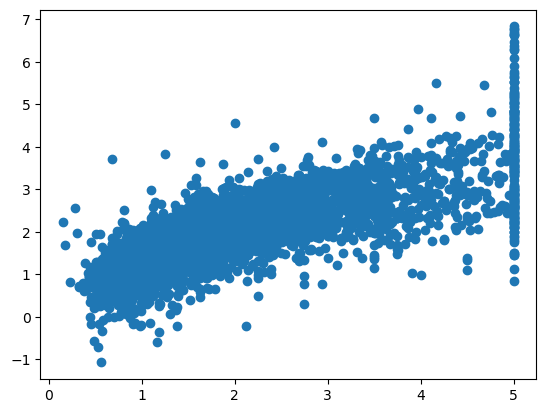

In [224]:
# scatter plot for the prediction
plt.scatter(y_test,y_pred)

In [226]:
# Residuals
residuals = y_test - y_pred

In [228]:
residuals

20046   -0.258248
3024    -1.292837
15663    2.528371
20484   -0.698135
9814     0.066564
           ...   
15362    0.437961
16623    0.306768
18086    0.555083
2144    -0.580233
3665    -0.378324
Name: price, Length: 4128, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


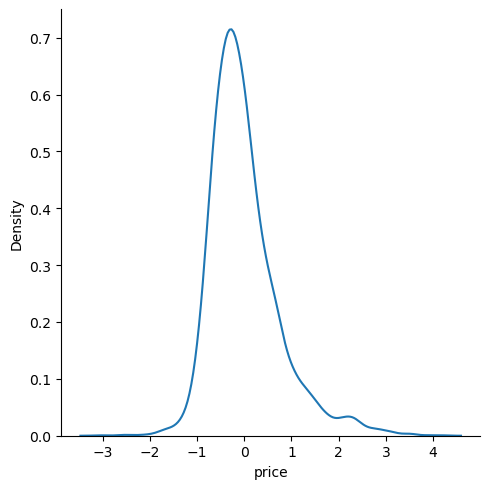

In [230]:
# ploting the residuals
sns.displot(residuals,kind='kde')

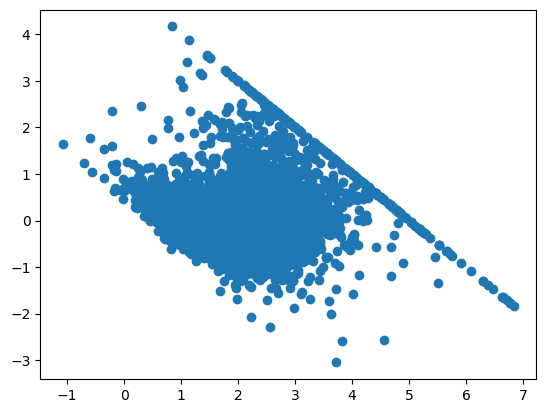

In [232]:
# scatter plot of the prediction and the residuals
plt.scatter(y_pred,residuals)

In [148]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [234]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.5473476153737101
0.5425696914126389
0.7398294501935633


## R square and Adjusted R square
### Formula

**R^2 = 1 - SSR/SST**


- R^2	=	coefficient of determination
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [236]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.5823077951522642


## Adjusted R square
### formula
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [238]:
print(1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1))

0.5816996531408382


In [240]:
# OLS linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [242]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.142
Method:                 Least Squares   F-statistic:                              456.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):                        0.00
Time:                        15:27:46   Log-Likelihood:                         -36429.
No. Observations:               16512   AIC:                                  7.287e+04
Df Residuals:                   16506   BIC:                                  7.292e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7084      0.020     36.151      0.000       0.670       0.747
x2             0.1245      0.018      6.900      0.000       0.089       0.160
x3             0.0459      0.019      2.385      0.017       0.008       0.084
x4            -0.0377      0.017     -2.205      0.027      -0.071      -0.004
x5            -0.9774      0.051    -19.332      0.000      -1.076      -0.878
x6            -0.9311      0.050    -18.552      0.000      -1.029      -0.833
==============================================================================
Omnibus:                     3573.993   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9058.040
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                       5.748   Cond. No.                         5.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
print(regression.coef_)

[ 0.70836644  0.12449981  0.04593673 -0.03774583 -0.97736795 -0.93107854]


Predictions:
House 1: $2.35
House 2: $1.80
House 3: $2.15


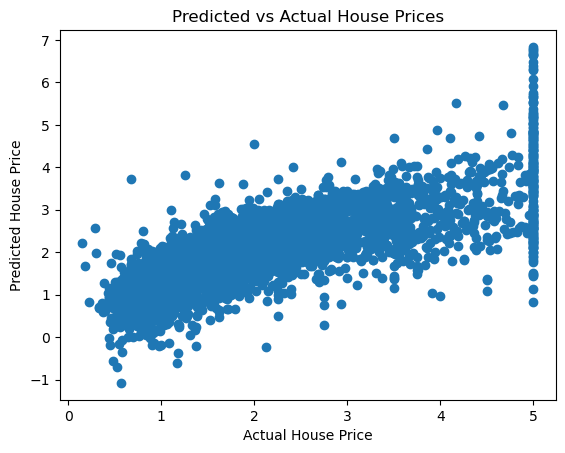

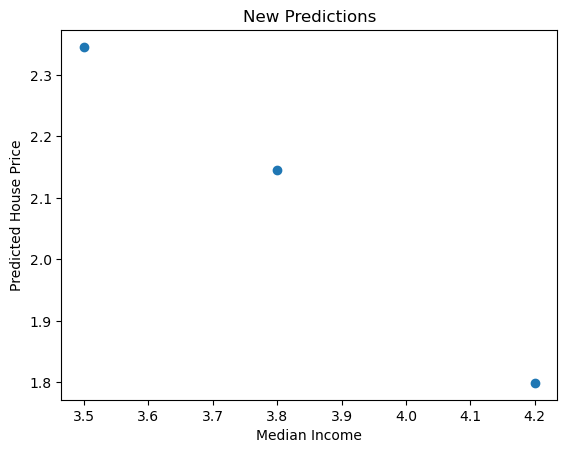

In [252]:
new_data = pd.DataFrame({
    'MedInc': [3.5, 4.2, 3.8],
    'HouseAge': [20, 30, 25],
    'AveRooms': [5, 6, 5.5],
    'AveOccup': [2, 3, 2.5],
    'Latitude': [37.5, 38.5, 37.8],
    'Longitude': [-122.5, -121.5, -122.0]
})
new_data_scaled = scaler.transform(new_data)

# Predict the new data
new_pred = regression.predict(new_data_scaled)

# Print the predictions
print('Predictions:')
for i, pred in enumerate(new_pred):
    print(f'House {i+1}: ${pred:.2f}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Predicted vs Actual House Prices')
plt.show()

# Plot the new predictions
plt.scatter(new_data['MedInc'], new_pred)
plt.xlabel('Median Income')
plt.ylabel('Predicted House Price')
plt.title('New Predictions')
plt.show()